In [1]:
import pandas as pd
df = pd.read_csv('error_sample.csv')

## Error 1 : Header error
Solution: rename function

In [2]:
df.head()

,name,price,likes,country,type,location,review,bookmark,discount_info
0,LAB EAT Restaurant & Bar,尖沙咀金巴利道87-89號僑豐大厦地下1-2號舖,$201-400,西式,海鮮,436,(565 食評),50744,網上訂座可享75折優惠
1,Shine,尖沙咀北京道12A號太子集團中心6樓,$201-400,西式,酒,693,(777 食評),21136,送 25里數 / 30積分
2,Yadllie Plate,旺角西洋菜街1號兆萬中心11樓,$101-200,韩国菜,NaN,487,(630 食評),27681,早鳥及消夜時段訂座 可享全單八折優惠
3,漁獲浜燒 Toretore Hamayaki,銅鑼灣軒尼詩道525號澳門逸園中心18樓,$201-400,日本菜,日本菜,503,(524 食評),19647,送 25里數 / 30積分
4,心之食堂 Love Cafe,銅鑼灣耀華街3號百樂中心12樓1203室,$201-400,日本菜,NaN,490,(545 食評),6580,全單85折


In [3]:
df.rename(columns={'price':'location','likes':'prices','location':'likes'}, inplace=True)
df.head()

,name,location,prices,country,type,likes,review,bookmark,discount_info
0,LAB EAT Restaurant & Bar,尖沙咀金巴利道87-89號僑豐大厦地下1-2號舖,$201-400,西式,海鮮,436,(565 食評),50744,網上訂座可享75折優惠
1,Shine,尖沙咀北京道12A號太子集團中心6樓,$201-400,西式,酒,693,(777 食評),21136,送 25里數 / 30積分
2,Yadllie Plate,旺角西洋菜街1號兆萬中心11樓,$101-200,韩国菜,NaN,487,(630 食評),27681,早鳥及消夜時段訂座 可享全單八折優惠
3,漁獲浜燒 Toretore Hamayaki,銅鑼灣軒尼詩道525號澳門逸園中心18樓,$201-400,日本菜,日本菜,503,(524 食評),19647,送 25里數 / 30積分
4,心之食堂 Love Cafe,銅鑼灣耀華街3號百樂中心12樓1203室,$201-400,日本菜,NaN,490,(545 食評),6580,全單85折


## Error 2: Duplicates error

solution: drop duplicates

In [4]:
len(df)

932

In [5]:
df = df.drop_duplicates()

In [6]:
len(df)

519

## Error 2 : Data format error
solution: replace function

In [7]:
df['prices'].value_counts()

$101-200    247
$201-400    181
$51-100      57
$401-800     28
$50以下         3
$101.00       3
Name: prices, dtype: int64

In [8]:
df['prices'].replace({'$101.00':'$101-200'}).value_counts()

$101-200    250
$201-400    181
$51-100      57
$401-800     28
$50以下         3
Name: prices, dtype: int64

## Error 3 : Format/Unity error
Solution: mapping & apply

In [9]:
df['country'].value_counts()

西式          102
日本菜          87
意大利菜         45
多國菜          43
港式           37
泰國菜          28
粵菜 (廣東)      27
韓國菜          25
法國菜          18
美國菜          16
西班牙菜         11
川菜 (四川)      10
台灣菜           9
意大利           8
越南菜           8
德國菜           7
印度菜           7
英國菜           6
比利時菜          4
京菜 (官府菜)      3
韩国菜           3
京川滬           2
澳洲菜           2
潮州菜           1
俄國菜           1
荷蘭菜           1
土耳其菜          1
蒙古菜           1
滬菜 (上海)       1
秘魯菜           1
印尼菜           1
湘菜 (湖南)       1
新加坡菜          1
葡國菜           1
Name: country, dtype: int64

In [10]:
mapping={
    '意大利':'意大利菜',
    '韩国菜':'韓國菜'
}
def cleaning(e):
    return mapping.get(e,e)
df['country'].apply(cleaning).value_counts()

西式          102
日本菜          87
意大利菜         53
多國菜          43
港式           37
韓國菜          28
泰國菜          28
粵菜 (廣東)      27
法國菜          18
美國菜          16
西班牙菜         11
川菜 (四川)      10
台灣菜           9
越南菜           8
印度菜           7
德國菜           7
英國菜           6
比利時菜          4
京菜 (官府菜)      3
澳洲菜           2
京川滬           2
秘魯菜           1
蒙古菜           1
印尼菜           1
湘菜 (湖南)       1
新加坡菜          1
土耳其菜          1
滬菜 (上海)       1
荷蘭菜           1
俄國菜           1
潮州菜           1
葡國菜           1
Name: country, dtype: int64

## Error 4 : Data range error
Solution: check out the real value in the source and replace

In [11]:
df['bookmark'].describe()

count       519.000000
mean       7859.811175
std       11858.187864
min           5.000000
25%        2626.000000
50%        5113.000000
75%       10634.500000
max      221502.000000
Name: bookmark, dtype: float64

In [12]:
df[df['bookmark'] == 5]

,name,location,prices,country,type,likes,review,bookmark,discount_info
922,Shoreditch,西環堅尼地城吉席街18號地舖,$201-400,英國菜,扒房,36,(58 食評),5,訂座可半價享用Love Lobster


In [13]:
df[df['bookmark'] == 221502]

,name,location,prices,country,type,likes,review,bookmark,discount_info
40,慢煮工業 Under Vacuum The Steak,太子太子道西91號地舖,$51-100,西式,三文治,258,(388 食評),221502,送 25里數 / 30積分


## Error 5 : None type error
Solution: replace the value with fillna() function

In [14]:
df['type'].head(20)

0         海鮮
1          酒
2        NaN
3        日本菜
4        NaN
5         扒房
6      甜品/糖水
7        NaN
8     樓上cafe
9       韓式炸雞
10       NaN
11        烤肉
12     壽司/刺身
13     甜品/糖水
14       NaN
15       爐端燒
16     甜品/糖水
17       NaN
18       NaN
19     甜品/糖水
Name: type, dtype: object

In [15]:
df['type'] = df['type'].fillna('')

In [16]:
df['type'].head(20)

0         海鮮
1          酒
2           
3        日本菜
4           
5         扒房
6      甜品/糖水
7           
8     樓上cafe
9       韓式炸雞
10          
11        烤肉
12     壽司/刺身
13     甜品/糖水
14          
15       爐端燒
16     甜品/糖水
17          
18          
19     甜品/糖水
Name: type, dtype: object

## Error 6 : Type error
solution: type() to checkout; convert type; replace error  

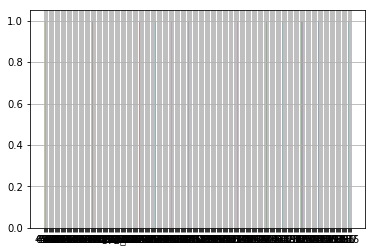

In [17]:
%matplotlib inline
df['likes'].hist(bins=20)
#type(df[likes]0) to check out whether the type is wrong

In [18]:
pd.to_numeric(df['likes']) #convert series string to nunmber 

ValueError: Unable to parse string "372个" at position 62

In [19]:
df[pd.to_numeric(df.likes, errors='coerce').isnull()] #filter out the error value

,name,location,prices,country,type,likes,review,bookmark,discount_info
62,泰聚 Thai Gather Restaurant & Bar,太子花園街239號嘉慶苑地下,$101-200,泰國菜,咖喱,372个,(259 食評),5434,15% Off
272,Cubus 28,銅鑼灣開平道1號Cubus 28樓,$101-200,粵菜 (廣東),酒吧,NaN,NaN,29,全單85折


In [20]:
df['likes'] = df['likes'].replace({'372个':'372','NaN':'0'})

In [21]:
df['likes'] = pd.to_numeric(df['likes'])

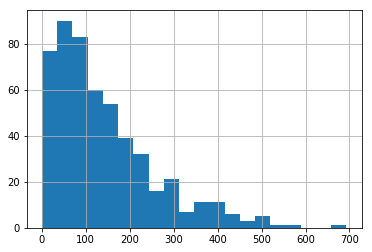

In [22]:
%matplotlib inline
df['likes'].hist(bins=20)